### Importing the Dependencies

#### Import the libraries for data analysis and data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Since the dataset is in IDX file format, it is necessary to convert it into numpy arrays, to pass it to the CNN model. Neural networks don’t work with images files, they work with tensors, so all these have to be converted into numpy arrays.

IDX file format is a binary file format. Now, why store in this format when we have other text file formats? The answer is performance and memory requirements. If we look in terms of performance, binary file formats are far better than text file formats like CSV. CSV file formats are used to store tabular data, where for reading a particular value on a certain row or column, the software has to iterate over all the previous values. Whereas in binary file format you can literally store anything, provided you also write the proper information for parsing it, in the header of the file. It then makes accessing a binary file simpler and faster


#### Importing the libraries to convert into npz format

In [2]:
import struct as st
import time
import math

#### Data Preprocessing

In [3]:
trainingfilenames = {'images' : 'train-images-idx3-ubyte' ,'labels' : 'train-labels-idx1-ubyte'}
testfilenames = {'images' : 't10k-images-idx3-ubyte' ,'labels' : 't10k-labels-idx1-ubyte'}

data_types = {0x08: ('ubyte', 'B', 1), 0x09: ('byte', 'b', 1), 0x0B: ('>i2', 'h', 2), 
              0x0C: ('>i4', 'i', 4), 0x0D: ('>f4', 'f', 4), 0x0E: ('>f8', 'd', 8)}

In [4]:
print("Training Dataset.......")

stime = time.time()

for name in trainingfilenames.keys():
    
    if name == 'images':
        train_imagesfile = open(trainingfilenames[name], 'rb')
    if name == 'labels':
        train_labelsfile = open(trainingfilenames[name], 'rb')

train_imagesfile.seek(0)
magic = st.unpack('>4B', train_imagesfile.read(4))

if(magic[0] and magic[1]) or (magic[2] not in data_types):
    raise ValueError("File Format not correct")

#Information
nDim = magic[3]
print("Data is " + str(nDim) + "-D")
dataType = data_types[magic[2]][0]
print("Data Type :: ", dataType)
dataFormat = data_types[magic[2]][1]
print("Data Format :: ", dataFormat)
dataSize = data_types[magic[2]][2]
print("Data Size :: " + str(dataSize) + " byte\n")

#offset = 0004 for number of images
#offset = 0008 for number of rows
#offset = 0012 for number of columns
#32-bit integer (32 bits = 4 bytes)

train_imagesfile.seek(4)
nImg = st.unpack('>I', train_imagesfile.read(4))[0] #num of images/labels
nR = st.unpack('>I', train_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I', train_imagesfile.read(4))[0] #num of columns

train_labelsfile.seek(8) #Since no. of items = no. of images and is already read
print("no. of images :: ", nImg)
print("no. of rows :: ", nR)
print("no. of columns :: ", nC)
print
#Training set
#Reading the labels

train_labels_array = np.asarray(st.unpack('>' + dataFormat*nImg, train_labelsfile.read(nImg*dataSize))).reshape((nImg, 1))

#Reading the Image data
nBatch = 10000
nIter = int(math.ceil(nImg/nBatch))
nBytes = nBatch*nR*nC*dataSize
nBytesTot = nImg*nR*nC*dataSize
train_images_array = np.array([])

for i in range(0, nIter):
    #try:
    temp_images_array = np.asarray(st.unpack('>' + dataFormat*nBytes, train_imagesfile.read(nBytes))).reshape((nBatch,nR,nC))
    '''except:
        nbytes = nBytesTot - (nIter-1)*nBytes
        temp_images_array = 255 - np.asarray(st.unpack('>'+'B'*nbytes,train_imagesfile.read(nbytes))).reshape((nBatch,nR,nC))'''
    #Stacking each nBatch block to form a larger block
    
    if train_images_array.size == 0:
        train_images_array = temp_images_array
    else:
        train_images_array = np.vstack((train_images_array, temp_images_array))
        
    temp_images_array = np.array([])
    print("Time taken :: " + str(time.time()-stime) + " seconds\n")
    print(str((float(i+1)/nIter)*100) + "% complete...\n")


print("Training Set Labels shape ::", train_labels_array.shape)
print("Training Set Image shape ::", train_images_array.shape)

print("Time of execution :: " + str(time.time() - stime) + " seconds\n")

Training Dataset.......
Data is 3-D
Data Type ::  ubyte
Data Format ::  B
Data Size :: 1 byte

no. of images ::  60000
no. of rows ::  28
no. of columns ::  28
Time taken :: 0.8524506092071533 seconds

16.666666666666664% complete...

Time taken :: 1.4931740760803223 seconds

33.33333333333333% complete...

Time taken :: 2.211251974105835 seconds

50.0% complete...

Time taken :: 2.8625106811523438 seconds

66.66666666666666% complete...

Time taken :: 3.5420424938201904 seconds

83.33333333333334% complete...

Time taken :: 4.237180948257446 seconds

100.0% complete...

Training Set Labels shape :: (60000, 1)
Training Set Image shape :: (60000, 28, 28)
Time of execution :: 4.237180948257446 seconds



In [5]:
print("Test Dataset.......")

stime = time.time()

for name in testfilenames.keys():
    
    if name == 'images':
        test_imagesfile = open(testfilenames[name],'rb')
    if name == 'labels':
        test_labelsfile = open(testfilenames[name],'rb')
        
test_imagesfile.seek(0)
magic = st.unpack('>4B', test_imagesfile.read(4))

if(magic[0] and magic[1]) or (magic[2] not in data_types):
    raise ValueError("File Format not correct")

nDim = magic[3]
print("Data is ", nDim,"-D")
print
#offset = 0004 for number of images
#offset = 0008 for number of rows
#offset = 0012 for number of columns
#32-bit integer (32 bits = 4 bytes)

test_imagesfile.seek(4)
nImg = st.unpack('>I', test_imagesfile.read(4))[0] #num of images/labels
nR = st.unpack('>I', test_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I', test_imagesfile.read(4))[0] #num of columns

test_labelsfile.seek(8) #Since no. of items = no. of images and is already read
print("no. of images :: ", nImg)
print("no. of rows :: ", nR)
print("no. of columns :: ", nC)
print
#Test set
#Reading the labels
test_labels_array = np.asarray(st.unpack('>' + dataFormat*nImg, test_labelsfile.read(nImg*dataSize))).reshape((nImg, 1))

#Reading the Image data
nBatch = 10000
nIter = int(math.ceil(nImg/nBatch))
nBytes = nBatch*nR*nC*dataSize
nBytesTot = nImg*nR*nC*dataSize
test_images_array = np.array([])

for i in range(0,nIter):
    #try:
    temp_images_array = np.asarray(st.unpack('>' + dataFormat*nBytes, test_imagesfile.read(nBytes))).reshape((nBatch, nR, nC))
    '''except:
        nbytes = nBytesTot - (nIter-1)*nBytes
        temp_images_array = 255 - np.asarray(st.unpack('>'+'B'*nbytes,test_imagesfile.read(nbytes))).reshape((nBatch,nR,nC))'''
    #Stacking each nBatch block to form a larger block
    if test_images_array.size == 0:
        test_images_array = temp_images_array
    else:
        test_images_array = np.vstack((test_images_array, temp_images_array))
        
    temp_images_array = np.array([])
    
    print("Time taken :: "+str(time.time() - stime) + " seconds\n")
    print(str((float(i+1)/nIter)*100) + "% complete...\n")


print("Test Set Labels shape ::", test_labels_array.shape)
print("Test Set Image shape ::", test_images_array.shape)

print("Time of execution : %s seconds" % str(time.time() - stime))

Test Dataset.......
Data is  3 -D
no. of images ::  10000
no. of rows ::  28
no. of columns ::  28
Time taken :: 0.6871259212493896 seconds

100.0% complete...

Test Set Labels shape :: (10000, 1)
Test Set Image shape :: (10000, 28, 28)
Time of execution : 0.6881234645843506 seconds


#### Checking the size of train and test arrays, which contain the images and labels

In [9]:
print(len(train_images_array))
print(len(test_images_array))

60000
10000


In [10]:
print(len(train_labels_array))
print(len(test_labels_array))

60000
10000


#### Normalizing to improve accuracy, can be easily achieved through tensorflow

 Normalization is a process that changes the range of pixel intensity values. The purpose of dynamic range expansion in the various applications is usually to bring the image, or other type of signal, into a range that is more familiar or normal to the senses, hence the term normalization. 

In [11]:
train_images_array = train_images_array.astype('float32')
test_images_array = test_images_array.astype('float32')

train_images_array = train_images_array/255.0
test_images_array = test_images_array/255.0

In [12]:
np.unique(train_labels_array) #last layer will have 10 neurons

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Constructing the CNN model

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

model.add(Dense(10))

In [16]:
loss_fn = SparseCategoricalCrossentropy(from_logits=True)
opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=opt, loss=loss_fn, metrics=['accuracy'])

In [17]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, restore_best_weights=True, mode='auto')

In [18]:
model.summary(line_length=75)

Model: "sequential"
___________________________________________________________________________
 Layer (type)                    Output Shape                  Param #     
 conv2d (Conv2D)                 (None, 26, 26, 32)            320         
                                                                           
 conv2d_1 (Conv2D)               (None, 24, 24, 64)            18496       
                                                                           
 max_pooling2d (MaxPooling2D)    (None, 12, 12, 64)            0           
                                                                           
 dropout (Dropout)               (None, 12, 12, 64)            0           
                                                                           
 flatten (Flatten)               (None, 9216)                  0           
                                                                           
 dense (Dense)                   (None, 128)                   11797

In [19]:
history = model.fit(x=train_images_array, y=train_labels_array, 
          validation_data=(test_images_array, test_labels_array), 
          epochs=15, batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/15
1875/1875 [==============================] - 92s 48ms/step - loss: 0.5083 - accuracy: 0.8168 - val_loss: 0.3277 - val_accuracy: 0.8801
Epoch 2/15
1875/1875 [==============================] - 91s 48ms/step - loss: 0.3388 - accuracy: 0.8769 - val_loss: 0.2741 - val_accuracy: 0.8998
Epoch 3/15
1875/1875 [==============================] - 98s 52ms/step - loss: 0.2924 - accuracy: 0.8937 - val_loss: 0.2525 - val_accuracy: 0.9067
Epoch 4/15
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2626 - accuracy: 0.9035 - val_loss: 0.2435 - val_accuracy: 0.9116
Epoch 5/15
1875/1875 [==============================] - 104s 55ms/step - loss: 0.2424 - accuracy: 0.9102 - val_loss: 0.2380 - val_accuracy: 0.9150
Epoch 6/15
1875/1875 [==============================] - 106s 56ms/step - loss: 0.2233 - accuracy: 0.9175 - val_loss: 0.2295 - val_accuracy: 0.9151
Epoch 7/15
1875/1875 [==============================] - 100s 54ms/step - loss: 0.2107 - accuracy: 0.9221 - val_loss: 0.23

##### Evaluating on the test set

In [20]:
test_loss, test_accuracy = model.evaluate(x=test_images_array, y=test_labels_array)

313/313 [==============================] - 3s 9ms/step - loss: 0.2218 - accuracy: 0.9225


In [21]:
print('Test loss: {:.3f}%. Test accuracy: {:.3f}%'.format(test_loss*100, test_accuracy*100))

Test loss: 22.180%. Test accuracy: 92.250%


In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Summarize history for accuracy, and loss

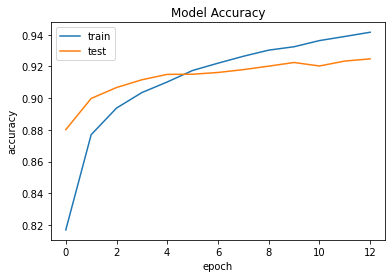

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

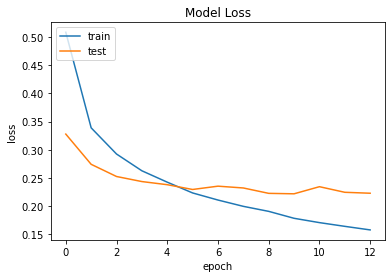

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Testing the Model

###### Importing Libraries for uploading the image and preprocessing it to feed into the model

In [69]:
from PIL import Image
from keras.preprocessing.image import img_to_array
from skimage import data
from skimage.color import rgb2gray

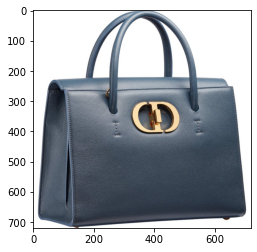

In [70]:
image_bag = "purse_ladies.jpg"

image1 = Image.open(image_bag)

plt.imshow(image1)

#### Creating functions to preprocess and reshape the image, then converting into grayscale

In [71]:
def preprocess_image(image):
    
    image = image.resize((28, 28))
    image = img_to_array(image)
    #img = preprocess_input(img)
    image = np.expand_dims(image, axis=0)
    
    return image

In [72]:
def reshape_normalize(image):
    
    image = image.reshape(1, 28, 28, 1)
    image = image.astype('float32')
    image = image/255.0
    
    return image

In [73]:
image_array = preprocess_image(image1)

Checking the dimensions of the image, and converting into grayscale since the model takes a grayscale image as input

In [74]:
print(len(image_array[0]))
print(len(image_array[0][0]))

28
28


In [75]:
img_gray = rgb2gray(image_array)

In [76]:
img_normalize = reshape_normalize(img_gray)

##### Creating a function to output the prediction

In [77]:
def prediction(preprocessed_image):
    
    y = model.predict(preprocessed_image)
    val = np.argmax(y)
    
    labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    result = ''
    
    for i, dress in enumerate(labels):
        
        if val == i:
            result = dress
            break
        
    return result

In [78]:
prediction(img_normalize)

'Bag'